<a href="https://colab.research.google.com/github/gerges87/Real-Time-sentimet-Analyzer-And-Reporter/blob/main/bodyfat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [ ]:
# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['bodyfat.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "bodyfat.csv"))

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df.isna().sum()

,0
Density,0
BodyFat,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Hip,0
Thigh,0


In [ ]:
df.duplicated().sum()

0

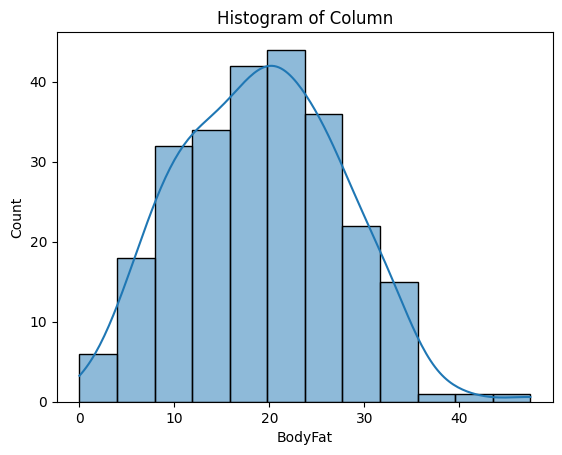

In [ ]:
sns.histplot(df["BodyFat"], kde=True)
plt.title("Histogram of Column")
plt.show()

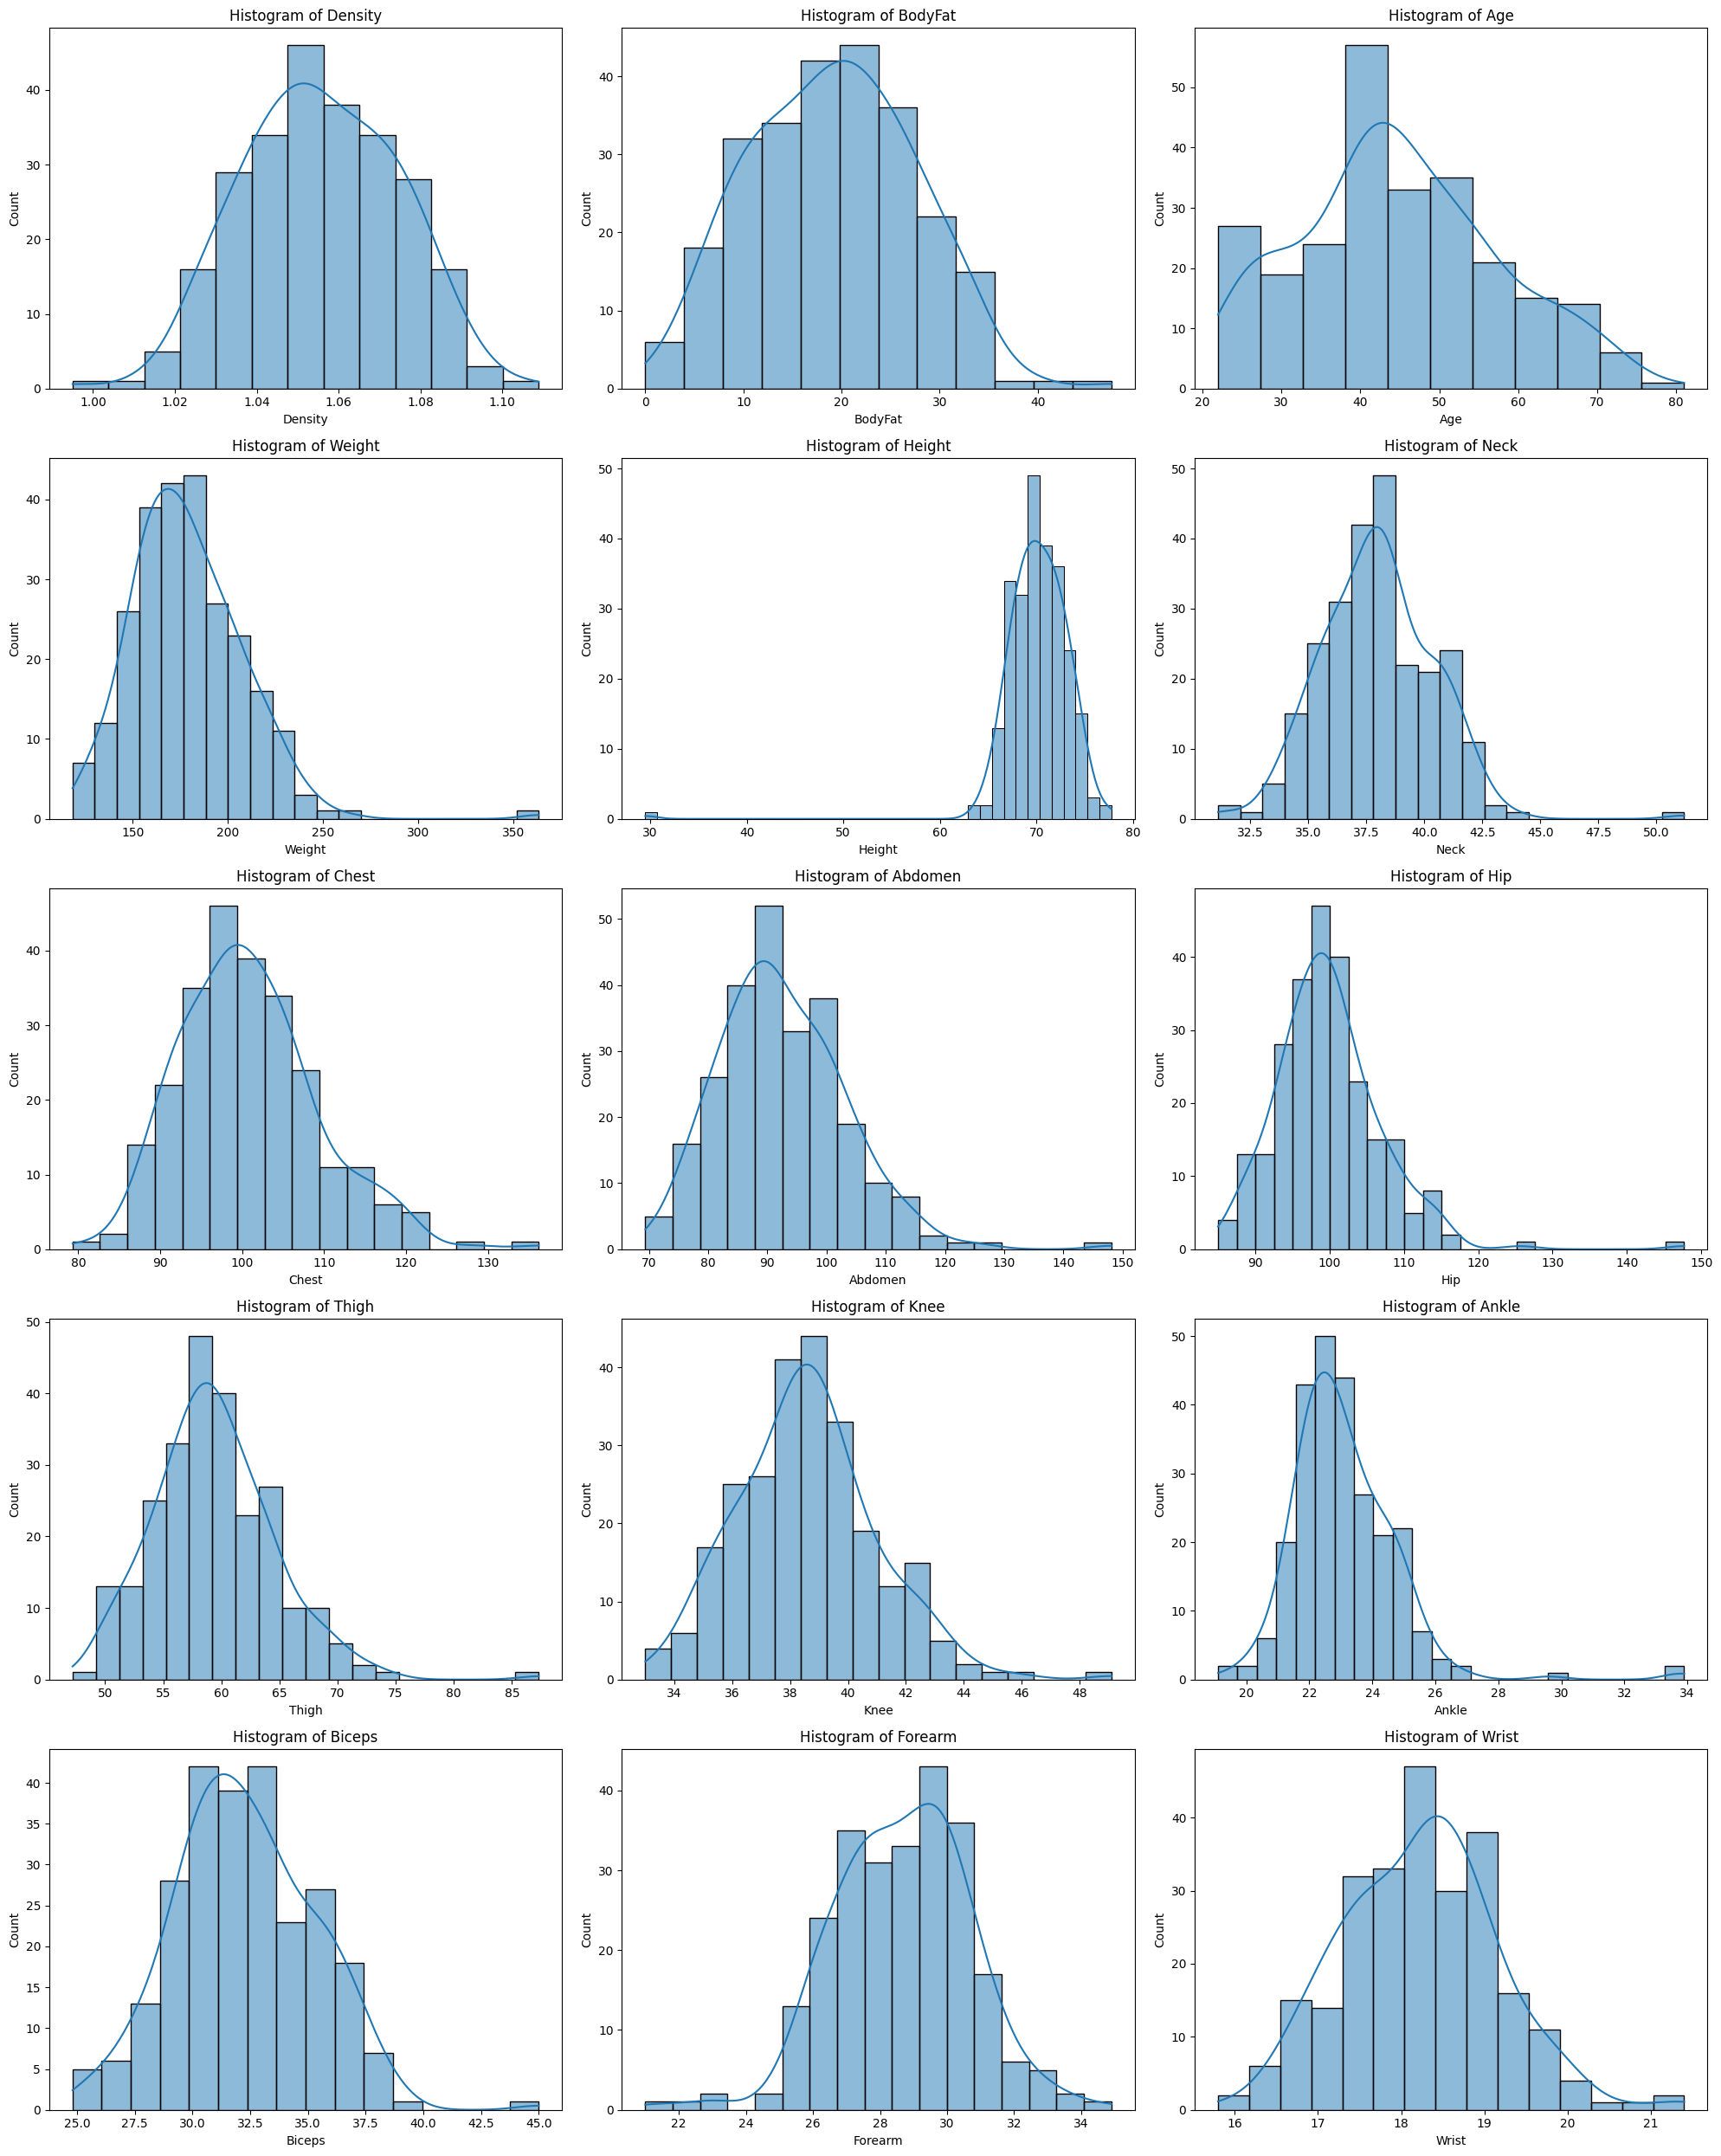

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_columns = df.columns
ncols = 3
nrows = (len(df_columns) // ncols) + (len(df_columns) % ncols > 0)  # Calculate required rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Adjust height dynamically

axes = axes.flatten()

for i, col in enumerate(df_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

# Hide unused subplots if columns don't fill all grid positions
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
categorical_features = df.select_dtypes(include=["object"]).columns
categorical_features

Index([], dtype='object')

In [ ]:
continuous_features = df.select_dtypes(include=["float64", "int64"]).columns
continuous_features

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [ ]:
for col in categorical_features:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [ ]:
df.isna().sum()

,0
Density,0
BodyFat,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Hip,0
Thigh,0


In [ ]:
for col in continuous_features:
    skewness = df[col].skew()
    if skewness > 1 or skewness < -1:
        print(f"{col}")
        df.dropna(subset=[col], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

Weight
Height
Hip
Ankle


<ipython-input-36-10aad7cc7d5c>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-36-10aad7cc7d5c>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
df.isna().sum()

,0
Density,0
BodyFat,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Hip,0
Thigh,0


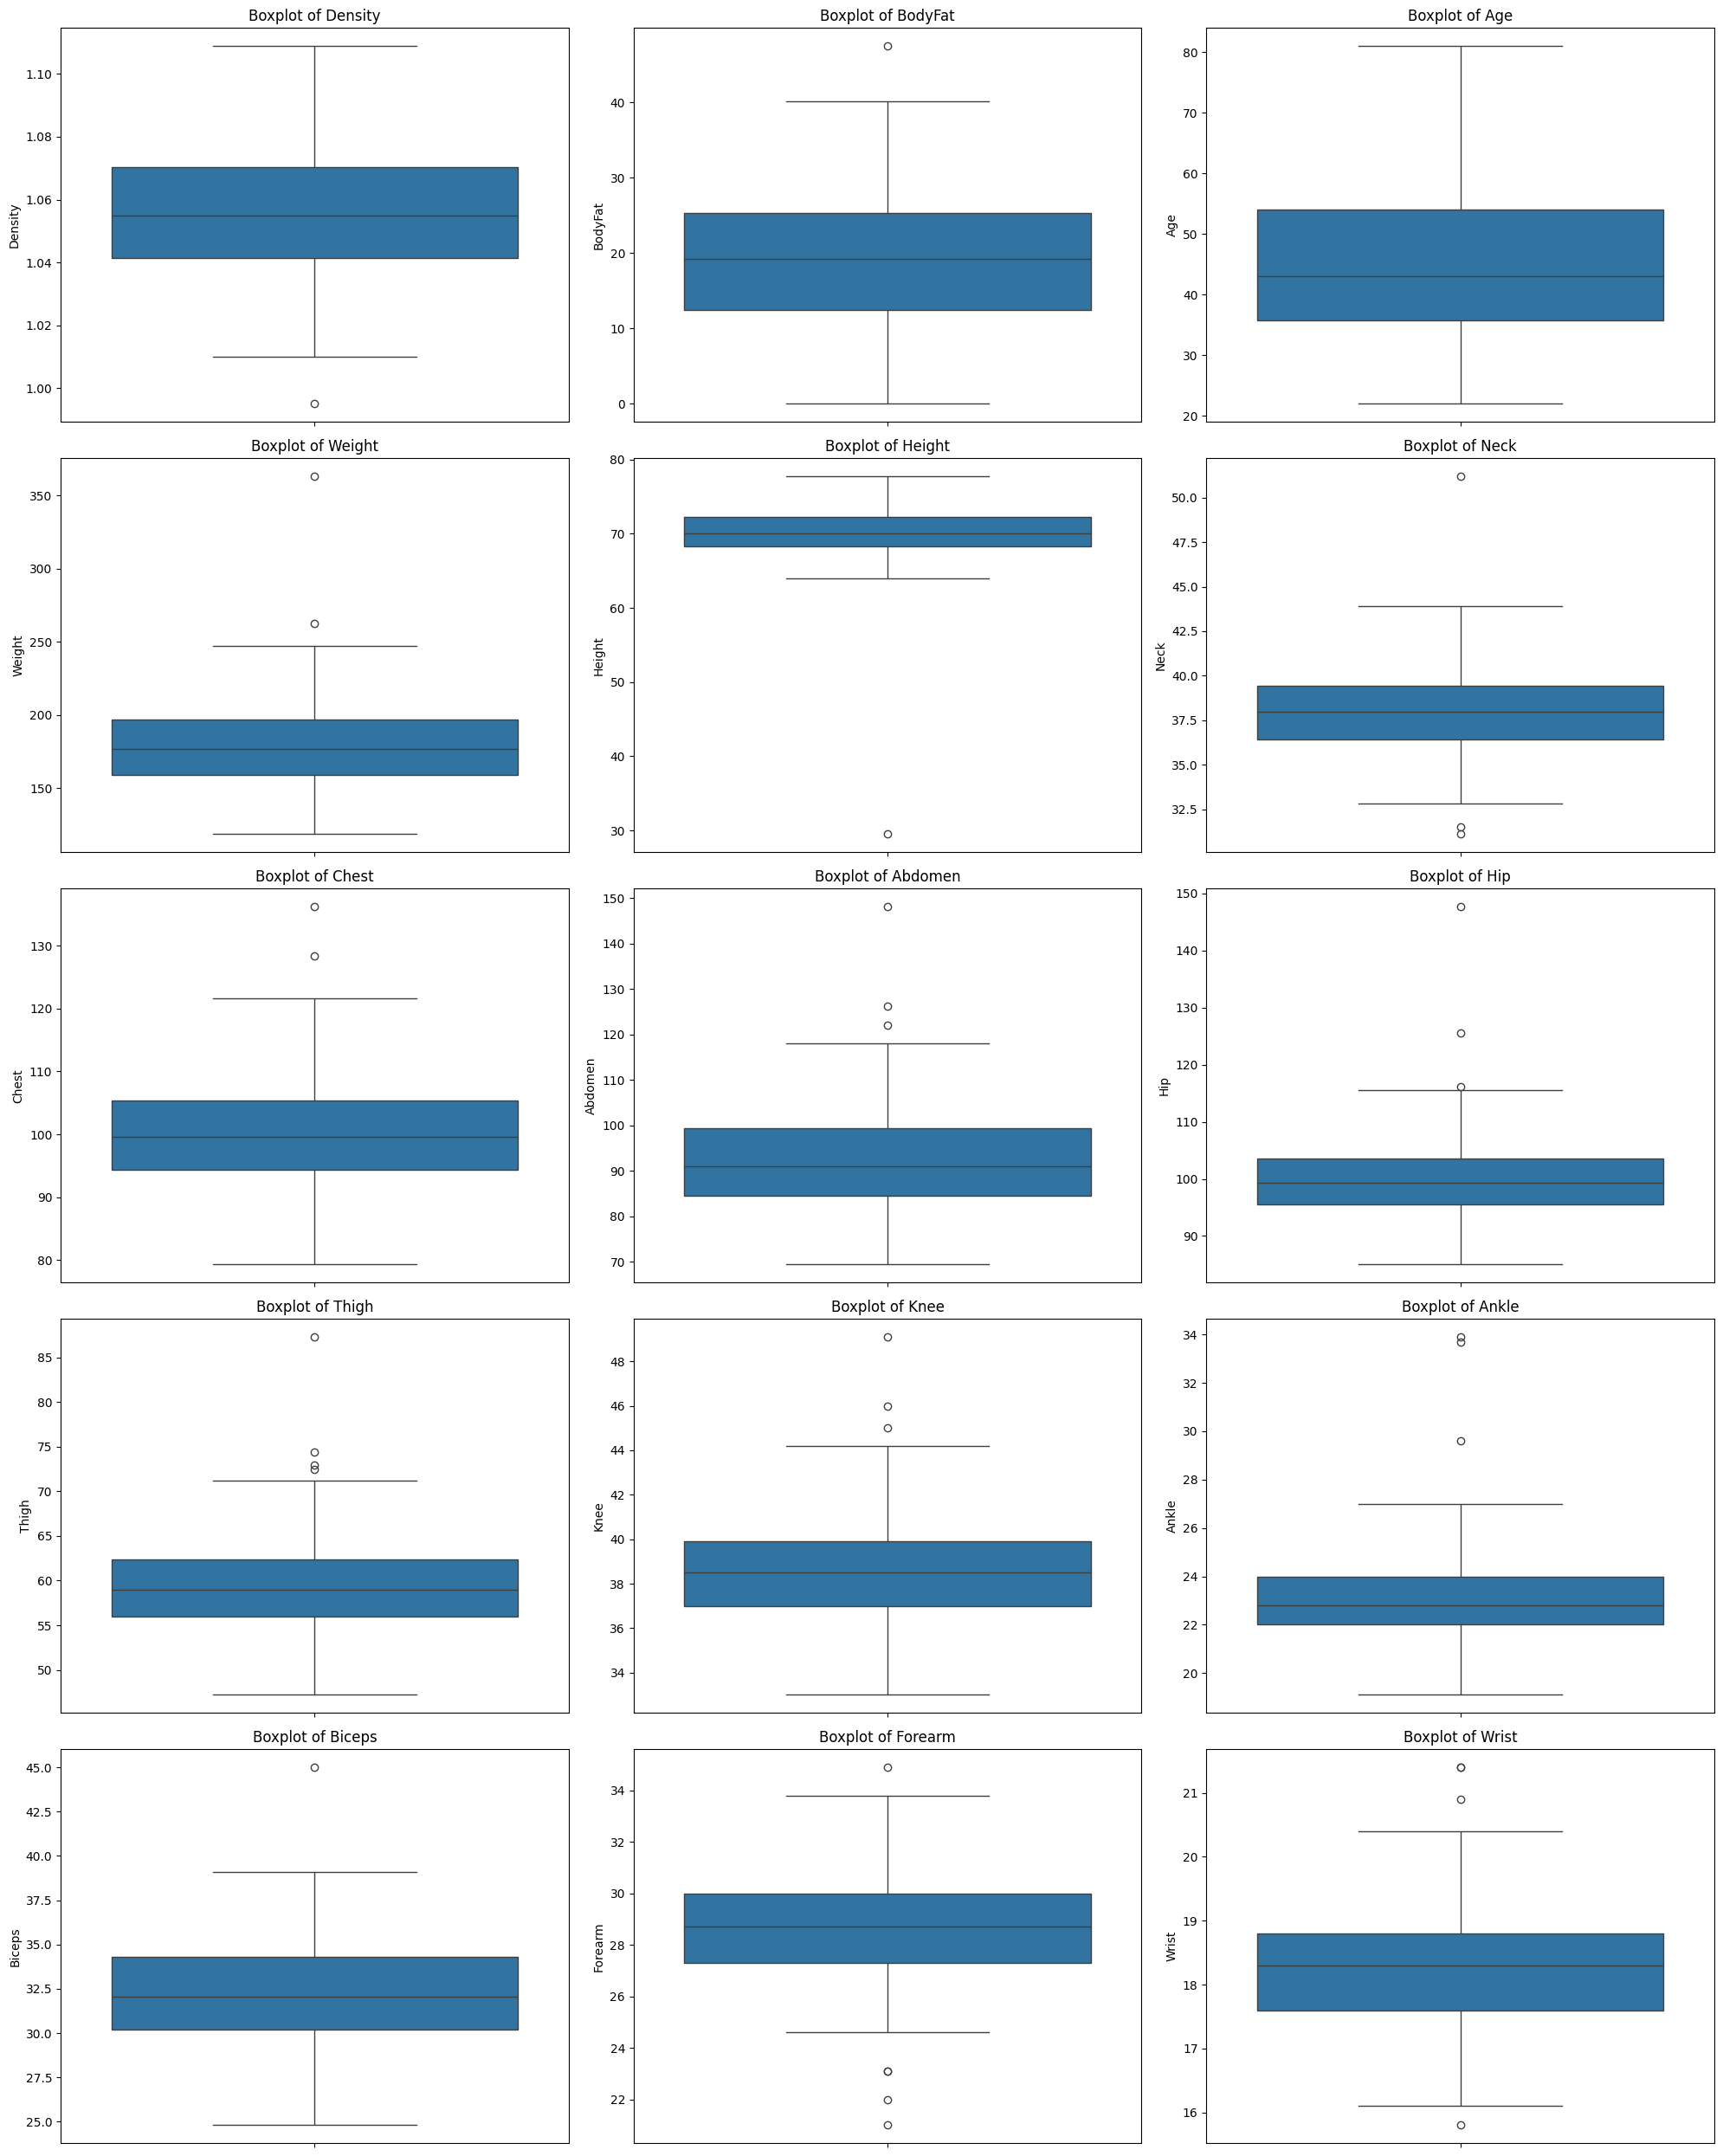

In [ ]:
ncols = 3
nrows = (len(df_columns) // ncols) + (len(df_columns) % ncols > 0)  # Calculate required rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Adjust height dynamically

axes = axes.flatten()

for i, col in enumerate(df_columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide unused subplots if columns don't fill all grid positions
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

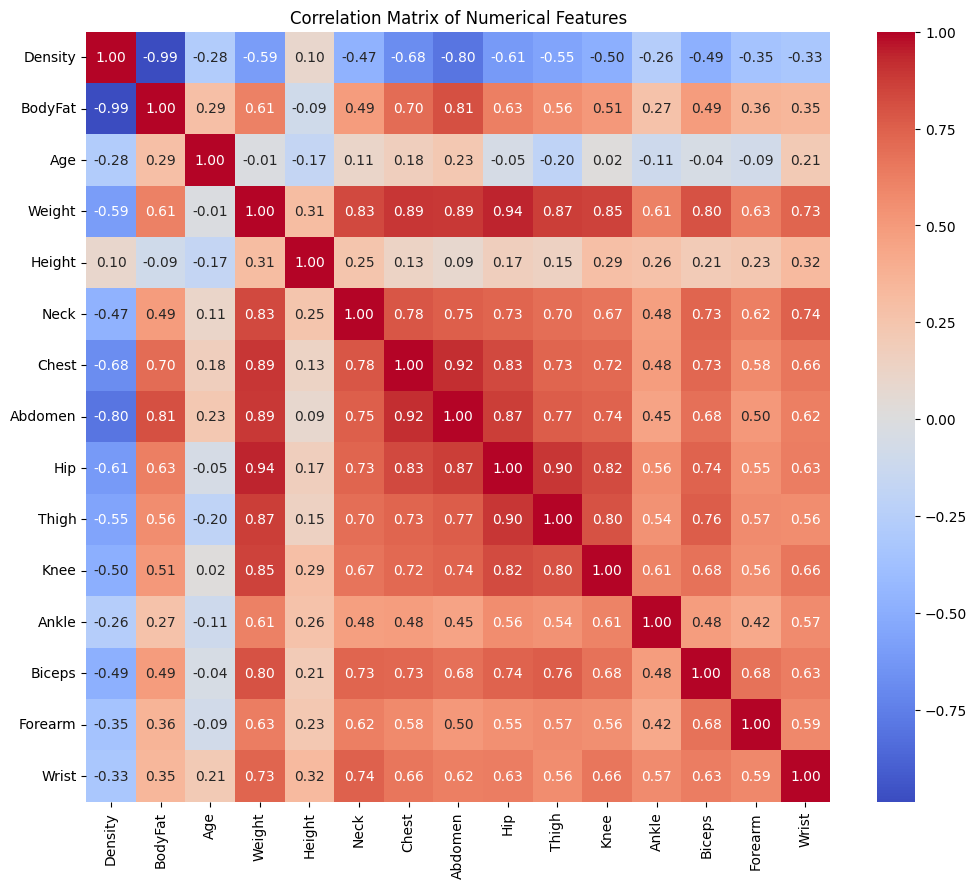

In [ ]:
correlation_matrix = df[continuous_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

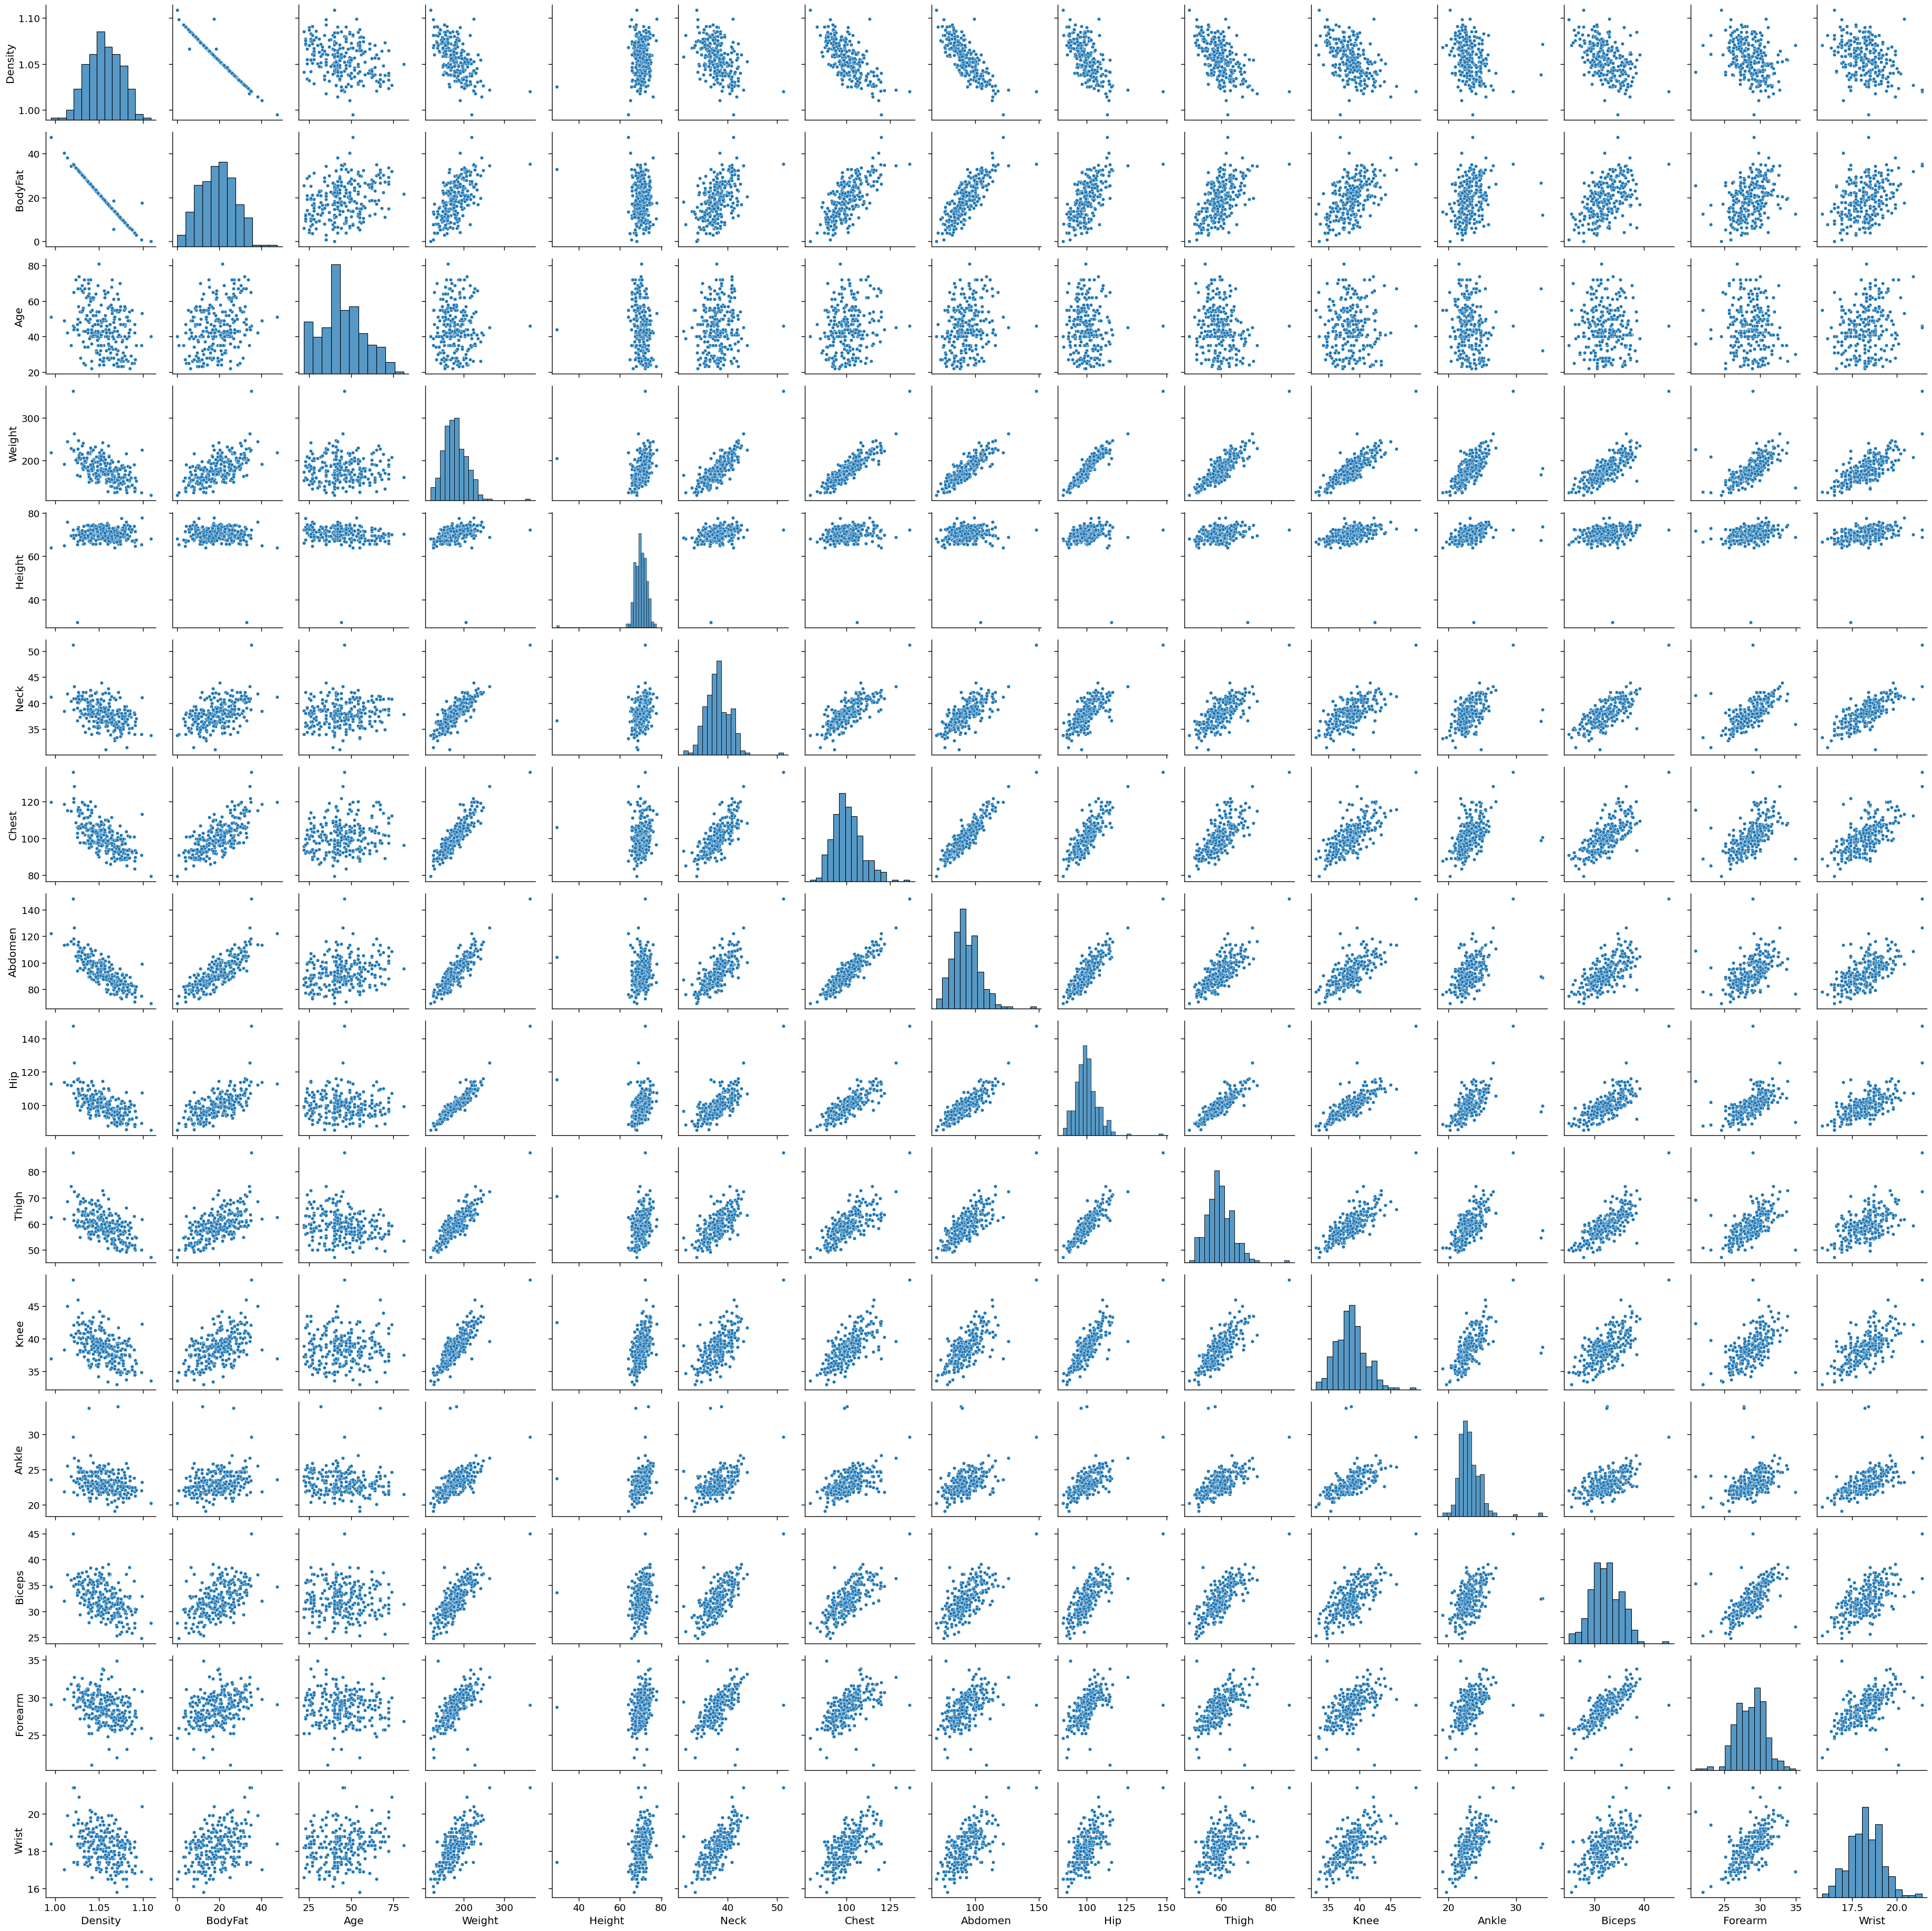

In [ ]:
sns.pairplot(df)

In [ ]:
label_encoders = {}  # Dictionary to store LabelEncoders for each column

for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the fitted encoder

print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [ ]:
# Standarizing the data
scaler = StandardScaler()

numerical_cols = ['Density', 'BodyFat', 'Age',
                  'Weight', 'Height','Neck', 'Chest', 'Abdomen',
                  'Hip', 'Thigh','Knee', 'Ankle', 'Biceps',
                  'Forearm', 'Wrist']

# Fit the scaler on the numerical columns
scaler.fit(df[numerical_cols])

# Transform the numerical columns using the fitted scaler
df[numerical_cols] = scaler.transform(df[numerical_cols])

# ... (rest of the code)

In [ ]:
X = df[['Density', 'BodyFat', 'Age',  # Removed extra spaces from column names
                  'Weight', 'Height','Neck', 'Chest', 'Abdomen',
                  'Hip', 'Thigh','Knee', 'Ankle', 'Biceps',
                  'Forearm', 'Wrist']]
y= df['Thigh']

In [ ]:
from sklearn.model_selection import train_test_split # This line should already be in your imports cell

# Define features (X) and target (y)
X = df[['Density', 'BodyFat', 'Age',
        'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
        'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps',
        'Forearm', 'Wrist']]
y = df['Thigh']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,  y_train)


LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

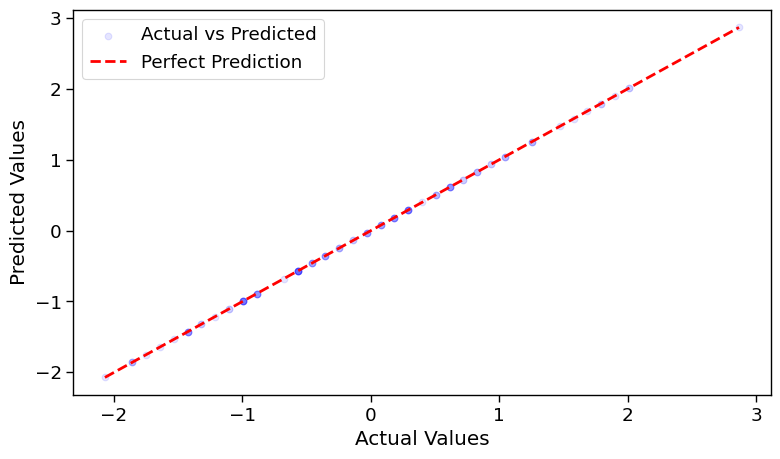

In [ ]:
plt.figure(figsize=(9, 5))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted', alpha=0.1,)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

<ipython-input-57-f73d90a72b95>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Wrist', ylabel='Density'>

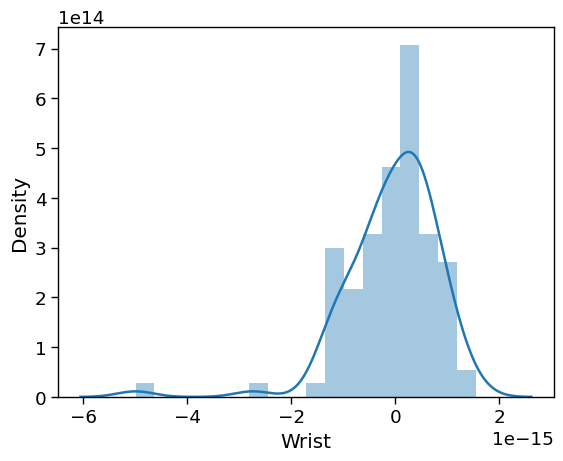

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:

# Now calculate the metrics
print("Mean Squared Error", mean_squared_error(y_test, predictions))
print("R2 Square Error:", r2_score(y_test, predictions))


Mean Squared Error 0.934458652278312
R2 Square Error: 0.037361706588875165
